# Freedom Debt Relief

Freedom Debt Relief’s customers are people who have a substantial amount of debt and because of an unexpected hardship, are no longer able to make their minimum monthly payments.  Upon enrolling in Freedom’s Debt Relief program, customers cease making payments to their creditors and instead make deposits they can afford into a new dedicated bank account with Freedom.  Freedom uses these funds to negotiate with each of the client’s creditors to settle the debt, typically at only a fraction of what was originally owed. Once a settlement has been agreed upon for an individual account, Freedom facilitates payments from the dedicated bank account to the creditor based on the terms of the settlement agreement.  Freedom then collects fees from the client for the individual account that was settled.  Freedom earns fees for each account it successfully negotiates a settlement agreement.  The number of settlement agreements Freedom can negotiate is proportional to the monthly deposited amount.  Assume industry statistics for any analysis input that you would want to use that is not provided here, including but not limited to fee percentage Freedom would collect along with ongoing cost per client between initial enrollment and program graduation.

### The task

Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom.  Assume the cost of this campaign was `$5` million.  There are five months of data in the datasets provided.  Let’s say campaign took place over the course of the third month.  You now want to show the marketing, sales and operations teams just how successful this campaign was. 

Using the three datasets given:

1.	Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

2.	Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

3.	How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

Assume the following:

- There is no seasonality in the results, and the campaign spend was distributed evenly across Month 3 (i.e., spend on the first day is the same as spend on the last day).
- Channel mix, targeting, and efficiency are outside the scope of this exercise.
- There may be data provided that is not useful in your end presentation

### The data

Attached you will find three files with the data you will need to complete the analysis.  

**Note:**  _These datasets were created for this analytical exercise and are only intended to be used to assess the critical thinking and technical abilities of interview candidates.  This data purposely does not reflect actual client or deposit information.  No inferences should be made from this information in regard to Freedom’s client base, deposit activity, company size or company growth trajectory._

client_table (`client_data.csv`):  You will find data specific to fictional clients

- client_id: Randomly generated unique surrogate identifier for a client
- client_geographical_region: Client geographical location in relation to U.S. Census definitions
- client_residence_status: Client residence status in relation to whether they rent or own
- client_age: Client age in relation to date of birth

deposit_table (`deposit_data.csv`):  You will find data specific to the client deposit behavior

- client_id: Randomly generated unique surrogate identifier for a client
- deposit_type: Delineates whether a client deposit is the scheduled record or actual record
- deposit_amount: Client deposit amount to the dedicated bank account with Freedom
- deposit_cadence: Timing and pattern of client deposit activity
- deposit_date: Deposit date for deposit type

calendar_table (`calendar_data.csv`):  This is a calendar reference table

- gregorian_date: This date aligns with the Gregorian calendar
- month_name: These are the designated months in the case study
- Month 1 and 2 are pre-campaign
- Month 3 is the campaign
- Month 4 and 5 are post-campaign

## Exploratory data analysis

The provided data is in CSV format, and we can use the Pandas library to load and analyse it. Since the data is given in three files, our first step would be to merge them into one set (i.e., a Pandas dataframe) for easier analysis and manipulation.

In [1]:
import pandas as pd

In [2]:
# load the three data sets
client_data = pd.read_csv("client_data.csv")
print("Client data shape", client_data.shape)
client_data.head()

Client data shape (46347, 4)


,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [3]:
deposit_data = pd.read_csv("deposit_data.csv")
print("Deposit data shape", deposit_data.shape)
deposit_data.head()

Deposit data shape (480394, 5)


,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [4]:
calendar_data = pd.read_csv("calendar_data.csv")
print("Calendar data shape", calendar_data.shape)
calendar_data.head()

Calendar data shape (153, 2)


,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


We will execute the merging in two steps:

1. Merge the client and the deposit data frames on the client ID column
2. Merge the resulting data frame from Step 1. with the calendar data set on the deposit / Gregorian date

Notice how the arguments' names change in the two merge steps. In the first step, the column that we want to merge on (or `join` in SQL terminology) is named the same in both data frames, so we only need to specify the `on` argument. In the second step, the merging column has different names, in the previously merged data frame it is called `deposit_date` and in the calendar dataframe it is named `gregorian_date`. To tell Pandas to use the desired columns, we need to specify the `left_on` and `right_on` arguments, where "left" is the dataframe that calls the `merge()` method, and "right" is the one that is being merged, i.e., the one provided as an argument. For extra info, we would suggest that you go through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) of the method.

In [5]:
# merging clients and deposits on client ID
df = client_data.merge(deposit_data, on="client_id")

In [6]:
# merging the calendar data on the date
df = df.merge(calendar_data, left_on="deposit_date", right_on="gregorian_date", copy=False)

In [7]:
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2
...,...,...,...,...,...,...,...,...,...,...
480389,495905820523476,West,Own,80,Actual Deposit,920.0,Monthly,2019-07-20,2019-07-20,Month 2
480390,639239952445612,Northeast,Own,80,Scheduled Deposit,224.0,Monthly,2019-07-20,2019-07-20,Month 2
480391,639239952445612,Northeast,Own,80,Actual Deposit,224.0,Monthly,2019-07-20,2019-07-20,Month 2
480392,585677614443848,West,Own,80,Scheduled Deposit,438.0,Monthly,2019-07-20,2019-07-20,Month 2


The resulting data frame looks OK, though we have the date column twice; once as gregorian date and second time as a deposit date. This is because the merging works by column names: columns with same values but different names are treated as different. We can easily solve it by dropping / deleting any one of the duplicated columns; let it be the Gregorian date.

In [8]:
df.drop(columns="gregorian_date", inplace=True)
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2
...,...,...,...,...,...,...,...,...,...
480389,495905820523476,West,Own,80,Actual Deposit,920.0,Monthly,2019-07-20,Month 2
480390,639239952445612,Northeast,Own,80,Scheduled Deposit,224.0,Monthly,2019-07-20,Month 2
480391,639239952445612,Northeast,Own,80,Actual Deposit,224.0,Monthly,2019-07-20,Month 2
480392,585677614443848,West,Own,80,Scheduled Deposit,438.0,Monthly,2019-07-20,Month 2


Let us start exploring this data set. We can dive deeper into the properties of each individual column. The clients' geographical region and residence status are categorical variables, and the age is a number.


Usually, for the categorical variables we can use Pandas' `value_counts()` method to get a list of the column's unique values, alongside a corresponding count. 

For the numerical column, we can call the `describe()` method to get box-plot statistics, like min, max value, and the 25th, 50th, and 75th percentiles. We can also plot it as a histogram, to get an overview of its distribution.

In [9]:
# there are four regions
df["client_geographical_region"].value_counts()

West         205629
South        108004
Midwest       88185
Northeast     78576
Name: client_geographical_region, dtype: int64

In [10]:
# two types of residence status
df["client_residence_status"].value_counts()

Own     345432
Rent    134962
Name: client_residence_status, dtype: int64

In [11]:
# the youngest client is 21 yrs, while the eldest is 105! 
df["client_age"].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

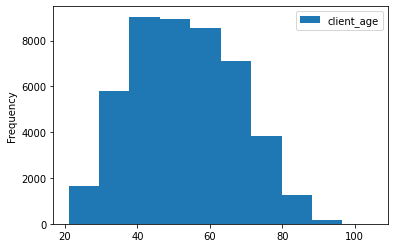

In [12]:
# most of the customers are between 40-60 years
_ = client_data[["client_age"]].plot(kind="hist")

As mentioned, we have five months worth of data. Months 1 and 4 have 30 days each, the rest have 31 days.

In [13]:
calendar_data["month_name"].value_counts()

Month 2    31
Month 3    31
Month 5    31
Month 1    30
Month 4    30
Name: month_name, dtype: int64

The data spans from June 01, 2019 up to the last day of October 2019.

In [14]:
df["deposit_date"].min(), df["deposit_date"].max()

('2019-06-01', '2019-10-31')

The type and cadence of the deposits are also categorical variables, so we would most likely be doing some groupings or plots around them. Let's start by first exploring their values.

In [15]:
# we have two types: scheduled and actual deposit
df["deposit_type"].value_counts()

Scheduled Deposit    247986
Actual Deposit       232408
Name: deposit_type, dtype: int64

In [16]:
# three types of cadence (or tempo) of deposits: monthly, biweekly, and extra
df["deposit_cadence"].value_counts()

Monthly     262858
Biweekly    209189
Extra         8347
Name: deposit_cadence, dtype: int64

We now turn our attention towards the deposit amount. The plot below plots the sum of all the deposits grouped by the month.

The type of the date column is currently a string (you can verify that by running `type(df["deposit_date"].values[0]`). For easier manipulation, we would like to convert it into a proper date object. Luckily, Pandas provides us with the [pd.to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) method that allows us to do that.

In [17]:
# convert the date column type to a datetime object
df["deposit_date"] = pd.to_datetime(df["deposit_date"])

We can use the Matplotlib library and its many customizeable methods to build our plot. The next cell imports the library's `pyplot` module, and modifies some of its parameters: the figure and the font size. These values should improve the readability of our plots.

In [18]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 7)

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


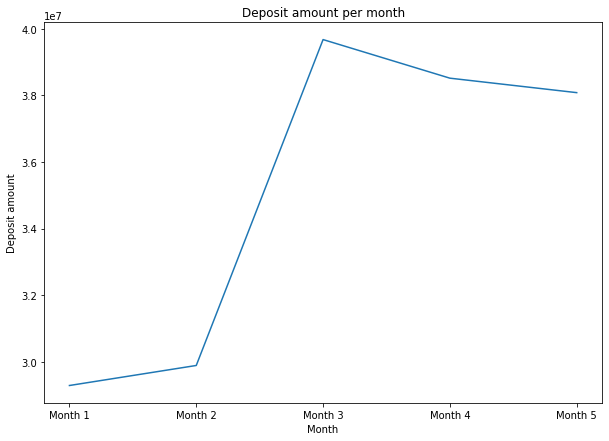

In [19]:
deposit_amount_by_month = df.groupby(by=df["month_name"])["deposit_amount"].sum()
print(deposit_amount_by_month)

# plots the line
_ = plt.plot(deposit_amount_by_month)
# set labels to the x and y axis and a plot title
_ = plt.title("Deposit amount per month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

Let's see how the plot looks like if we replace the amount by the number of deposits. The plot looks pretty much the same as the previous, the only meaningful difference lies in the aggregation function in the `groupby` operation. We use the `size` function, which returns the number of rows associated with each group.

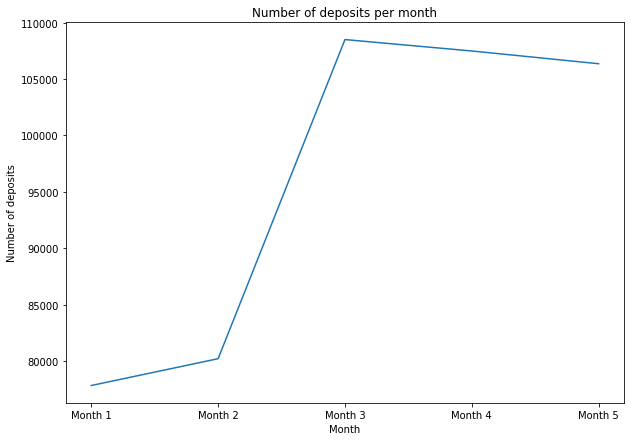

In [20]:
deposit_amount_by_month = df.groupby(by=df["month_name"]).size()
# plots the line
_ = plt.plot(deposit_amount_by_month)
# set labels to the x and y axis and a plot title
_ = plt.title("Number of deposits per month")
_ = plt.ylabel("Number of deposits")
_ = plt.xlabel("Month")

We will repeat the same procedure by grouping on the deposit type and cadence.

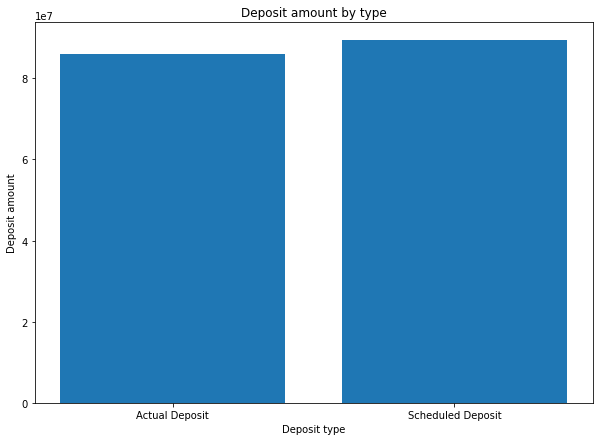

In [21]:
deposit_amount_by_type = df.groupby(by=df["deposit_type"])["deposit_amount"].sum()

# plots the line
_ = plt.bar(deposit_amount_by_type.index, deposit_amount_by_type)
# set labels to the x and y axis and a plot title
_ = plt.title("Deposit amount by type")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit type")

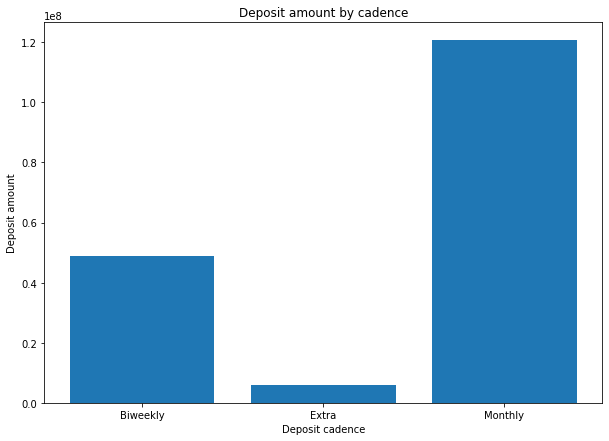

In [22]:
deposit_amount_by_cadence = df.groupby(by=df["deposit_cadence"])["deposit_amount"].sum()

# plots the line
_ = plt.bar(deposit_amount_by_cadence.index, deposit_amount_by_cadence)
# set labels to the x and y axis and a plot title
_ = plt.title("Deposit amount by cadence")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit cadence")

We can drill down even further, by grouping on multiple columns and showing even more advanced insights. Let's for example, plot the deposit amount per cadence and through time.

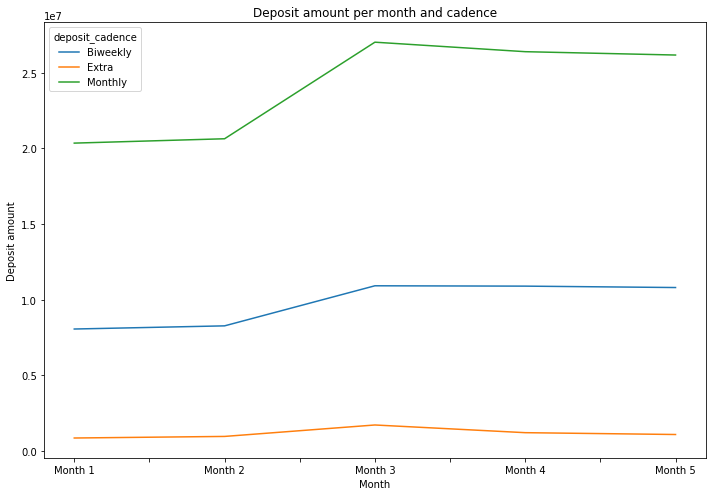

In [23]:
tmp_df = df.groupby(by=[df["deposit_cadence"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

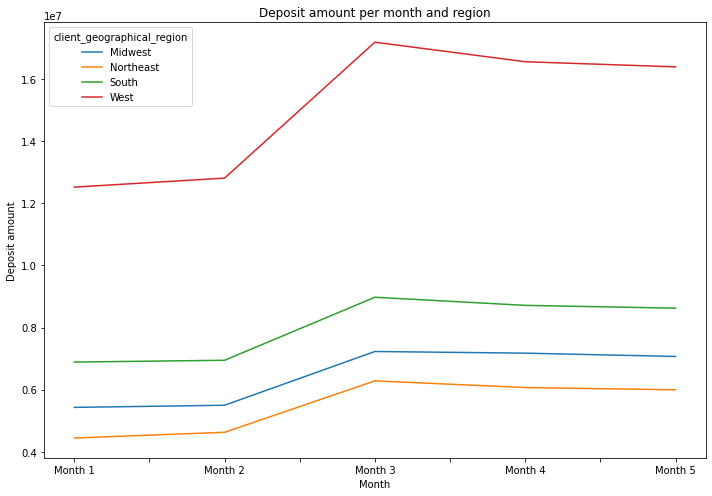

In [24]:
tmp_df = df.groupby(by=[df["client_geographical_region"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and region")
plt.tight_layout()

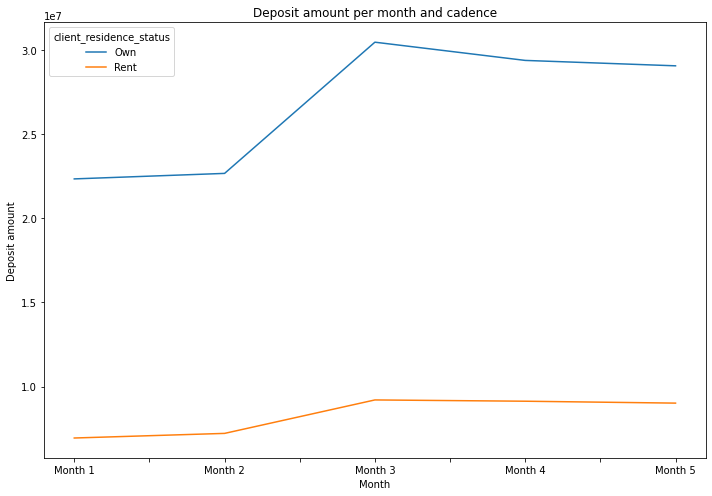

In [25]:
tmp_df = df.groupby(by=[df["client_residence_status"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

Once we have gotten ourselves familiar with the data, we can move on to answer the questions.

#### [Question 1]  
##### Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

This question can already be answered from the plots in the previous sections, specially the ones that show the deposit amount per month. We know that the ad campaign was running during the 3rd month of our data set (which is Month 8 in the current year, i.e., August). A huge spike can be noticed in the line plot titled __"Deposit amount per month"__ between months 7 & 8, i.e., while the campaign was running. Since then, the deposit amount has been slowly decreasing, but has remained on very higher levels than before the campaign. To put this into numbers:

- During the month the campaign was running, Freedom Debt Relief received almost `$10 million` dollars increase in deposit amounts than previous months

- In the months following the campaign, the total deposit amount starts to slowly decrease, but is still on higher levels than before the ad campaign: `$8.5 millions` in the month imediatelly following the campaign, and `$8 millions` in the last month of the data
- The cost of the campaign was `$5 millions`, and the incurred deposit amount increased by a total of `$26.5 millions`. A quick Google search for "freedom debt relief pricing" reveals a `18-25%` fee incurred by the company for its services. We would assume that this is based on the residence status and the deposit cadence, but neither the data nor the task description provide any estimate or hint to this. Assuming the lowest, `18%` fee for all clients, we observe an increase of profits to `$4.77 millions (26.5M * 18%)`. While this looks like a loss of `$23K` for the campaign, it is important to note that the trend shows this would have been much higher without the campaign, and it is very unlikely that the minimum fee is applied to all clients, so this number should be treated as the most pessimistic estimate.

Another quantitative assessement that we can make is to see the number of new clients that were brought in during and after the market campaign. We can work with Python's `set` methods to achieve this.

In [28]:
# clients that have made any deposit in the first two months
clients_before_campaign = df[(df["month_name"] == "Month 1")
                           | (df["month_name"] == "Month 2")]["client_id"].unique()
clients_before_campaign.shape

(34051,)

In [29]:
# clients that have made any deposit in the third month
clients_during_campaign = df[(df["month_name"] == "Month 3")]["client_id"].unique()
clients_during_campaign.shape

(43806,)

In [30]:
# clients that have made any deposit after the campaign
clients_after_campaign = df[(df["month_name"] == "Month 4")
                          | (df["month_name"] == "Month 5")]["client_id"].unique()
clients_after_campaign.shape

(41862,)

__Question__: How many new clients were acquired while the ad campaign was running?

A new client is one that has made his first deposit while the campaign was running. 

*This is not necessarily correct, i.e., a client could have made deposits in the past, but since we do not have data for it we will assume that he hasn't made any.

__Answer__:

In [31]:
# convert arrays to sets, and find their difference
len(set(clients_during_campaign).difference(set(clients_before_campaign)))

11544

__Question__: How many after the campaign?

__Answer__:

In [32]:
len(
    set(clients_after_campaign).difference(set(clients_before_campaign).union(set(clients_during_campaign)))
)

752

Another interesting insight that we can calculate is to see how the number of scheduled and actual deposits changes through time. We would expect both numbers to be rising to higher levels during and after the campaign.

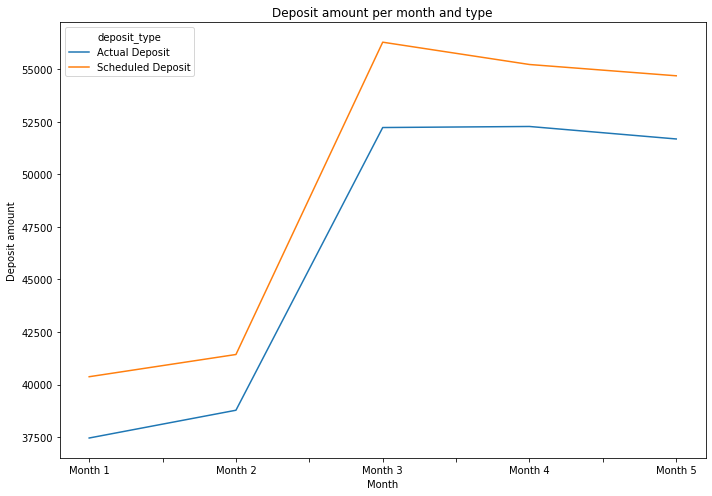

In [33]:
temp_df = df.groupby(by=[df["deposit_type"], df["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

As expected, this plot very closely matches the distributions of the plots in the analysis section. During the ad campaign, the number of actual and scheduled deposits increases for `25%`, or `10K` transactions, and while it gradually decreases in the next two months, it still remains very high, at above `50K` deposits per type each, while the pre-campaign levels were at around `40K`. 

#### [Question 2]
##### Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

Almost all of the plots show similar patterns through time and it is difficult to make any suggestions.

One thing that could be explored more is targeted marketing. We notice that most of the people in the data are middle-aged (40-60 years) and most of them are home owners. We can observe this in the age histogram and the count per residence status in the EDA section.

In the next plot, we will show the deposit amount changing through time and age group. We will use the [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) method to create groups of customers based on their age: we will simply divide their age by 10. The lower the group, the younger the customer is.

In [26]:
def discretize_age(row):
    """
    This function gets applied for each row and returns 
    the age group {age / 10} for each customer.
    """
    return int(row.client_age / 10)

dff = df.copy(deep=True)
dff["age_group"] = dff.apply(discretize_age, axis=1)
dff

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,age_group
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2,9
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2,2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2,2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2,8
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2,8
...,...,...,...,...,...,...,...,...,...,...
480389,495905820523476,West,Own,80,Actual Deposit,920.0,Monthly,2019-07-20,Month 2,8
480390,639239952445612,Northeast,Own,80,Scheduled Deposit,224.0,Monthly,2019-07-20,Month 2,8
480391,639239952445612,Northeast,Own,80,Actual Deposit,224.0,Monthly,2019-07-20,Month 2,8
480392,585677614443848,West,Own,80,Scheduled Deposit,438.0,Monthly,2019-07-20,Month 2,8


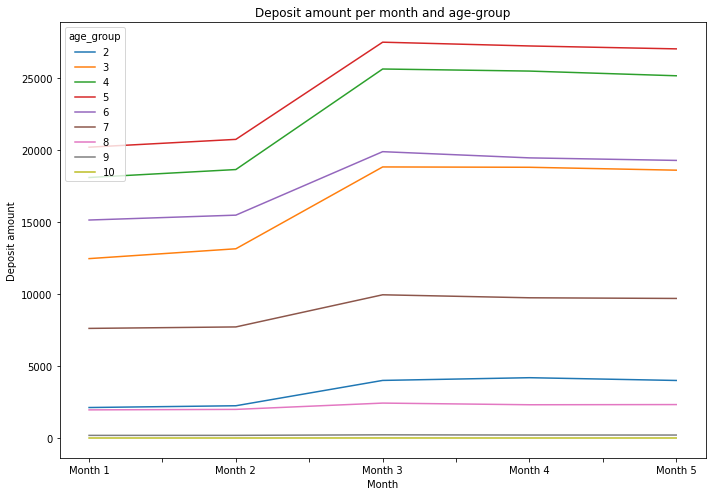

In [27]:
tmp_df = dff.groupby(by=[dff["age_group"], dff["month_name"]]).size()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and age-group")
plt.tight_layout()

We observe big increase in middle-aged customers and little to no increase in very young or very old customers. Their low count probably accounts for that. In the following analysis, we focus on the middle-aged sub-group of customers. We think that better engagement with them could result in more deposits.

In [34]:
df_q2 = df[(df["client_residence_status"] == "Own") 
         & (df["client_age"] <= 60) 
         & (df["client_age"] >= 40)]
df_q2.shape

(181068, 9)

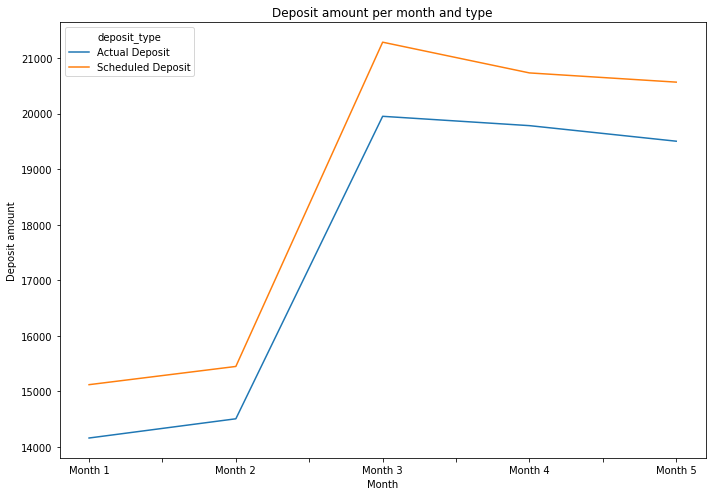

In [35]:
temp_df = df_q2.groupby(by=[df_q2["deposit_type"], df_q2["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

This sub-group of customers is responsible for 42% of the extra deposit amount, and yet represents only 37% of clients.

In [36]:
extra_deposit_df_q2 = df_q2[df_q2["deposit_cadence"] == "Extra"]["deposit_amount"].sum()
extra_deposit_df = df[df["deposit_cadence"] == "Extra"]["deposit_amount"].sum()

extra_deposit_df_q2 / extra_deposit_df

0.4234867523021417

In [37]:
df_q2.shape[0] / df.shape[0]

0.3769156150992727

We can further explore the extra deposits to identify client groups that are of interest.

In [38]:
df[df["deposit_cadence"] == "Extra"]["client_geographical_region"].value_counts()

West         3570
South        1991
Midwest      1486
Northeast    1300
Name: client_geographical_region, dtype: int64

In [39]:
df[df["deposit_cadence"] == "Extra"]["client_residence_status"].value_counts()

Own     5856
Rent    2491
Name: client_residence_status, dtype: int64

In [40]:
df[df["deposit_cadence"] == "Extra"]["deposit_type"].value_counts()

Actual Deposit    8347
Name: deposit_type, dtype: int64

In [41]:
df[df["deposit_cadence"] == "Extra"]["month_name"].value_counts()

Month 3    2235
Month 4    1898
Month 5    1846
Month 2    1274
Month 1    1094
Name: month_name, dtype: int64

Some key points based on the previous cells:

- Most extra deposits are observed in the West region as expected. This distribution closely matches the distribution of other deposit types as well
- Clients who own their residence are approx. 2.33 times as likely to deposit extra amount than clients who rent their residence
- Most extra deposits are observed in Month 3, when the campaign was running. Post-campaign numbers for extra deposits are 33% higher than pre-campaign.

#### [Question 3]
##### How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

One way we can simulate the postponement of the campaign is to "postpone" the deposits coming from new clients who were acquired during the third month. We (strongly) assume that the clients who made their first deposit in the third month in the data set are acquired due to the campaign; this is not necesarily correct, but for the sake of the exercise we can treat it as if it were.

Technically speaking, this means we should take the following steps.

1. Identify which clients made their first deposit in the third month, i.e., were acquired because of the campaign. (we have already done that in previous sections)
2. Postpone their deposits until after the fifth month, i.e., add exactly three months to the date of their deposit.
3. Re-run the same analyses from **Question 1** and make summarise the difference in the results.

In [42]:
# we make a copy of the deposit data to be able to simulate the postponement
# without messing up the original data set
df_copy = df.copy(deep=True)

In [43]:
# a set of client_id's that are considered 'new', 
# i.e., were acquired during the campaign was running
new_clients = set(clients_during_campaign).difference(set(clients_before_campaign))

In [44]:
import datetime

def simulate_campaign_postponement(row):
    """
    Adds three months to the date of the deposit if the client is new, in two steps:
    
    1. Transform the deposit date to type datetime and add 90 days to it
    2. Manually handle the month name; add three to it
    
    """
    if row.client_id in new_clients:
        row.deposit_date = pd.to_datetime(row.deposit_date) + datetime.timedelta(days=90)
        if row.month_name == "Month 3":
            row.month_name = "Month 6"
        elif row.month_name == "Month 4":
            row.month_name = "Month 7"
        elif row.month_name == "Month 5":
            row.month_name = "Month 8"
    else:
        row.deposit_date = pd.to_datetime(row.deposit_date)
    return row

# axis=1 applies the function we provide row-wise, axis=0 does it column-wise
df_copy = df_copy.apply(func=simulate_campaign_postponement, axis=1)

In [45]:
df_copy["deposit_date"].max()

Timestamp('2020-01-29 00:00:00')

We can now plot the same graphics as in the introductory EDA section.

Deposit amount per month month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    30002419.69
Month 4    27306769.25
Month 5    28138150.45
Month 6     9672637.41
Month 7    11209050.48
Month 8     9943024.78
Name: deposit_amount, dtype: float64


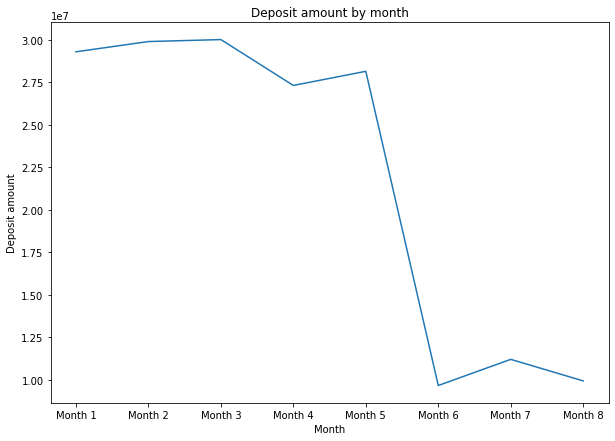

In [46]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()

print("Deposit amount per month", deposit_amount_by_month)
# plots the line
_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The plots looks a bit weird, because in months 6, 7, and 8 we have only the data coming from the new customers, and this is obviously going to be much lower than usual. 

To simulate the deposits coming from the existing customers, we can simply add a average deposit amount from the previous months.

In [47]:
avg_monthly_deposit = (df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()).mean()

In [48]:
avg_monthly_deposit

21930414.27375

month_name
Month 1    2.928483e+07
Month 2    2.988643e+07
Month 3    3.000242e+07
Month 4    2.730677e+07
Month 5    2.813815e+07
Month 6    3.160305e+07
Month 7    3.313946e+07
Month 8    3.187344e+07
Name: deposit_amount, dtype: float64


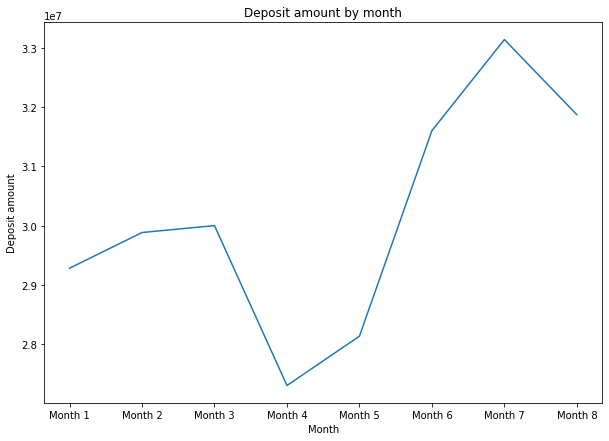

In [49]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()

# add the average monthly deposit estimate to the simulated months
deposit_amount_by_month.at["Month 6"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 7"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 8"] += avg_monthly_deposit

print(deposit_amount_by_month)

# plots the line
_ = plt.plot(deposit_amount_by_month)
# set labels to the x and y axis and a plot title
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The simulation shows quite an increase in deposits. Following are some key points to summarise the difference from the answer provided in **Question 1**.

- During the month the campaign was running, Freedom Debt Relief received almost \\$2.5 million dollars increase in deposit amounts than previous months, compared to \\$10 million in **Question 1**.

- In the month following the campaign, the total deposit amount continues to increase to reach its maximum at \\$33 million. The last month it drops to \\$ 31 million, but remains on higher level than pre-campaign.

- The cost of the campaign was \\$5 millions, and the incurred deposit amount increased by a total of \\$8 millions. In **Question 1** this number was much higher: \\$26 millions, and we determined that that was borderline profitable. So, \\$8 millions is much lower, and we conclude that postponing the campaign would have not been the right choice.